In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import plotly.express as px
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

sns.set_theme(style="dark")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = pd.read_pickle('cleaned_data.pkl')

In [3]:
data.columns

Index(['my_win', 'match_id', 'barracks_status_dire', 'barracks_status_radiant',
       'cluster', 'dire_score', 'duration', 'first_blood_time', 'game_mode',
       'lobby_type', 'picks_bans', 'radiant_score', 'start_time',
       'tower_status_dire', 'tower_status_radiant', 'players', 'patch',
       'region', 'player_slot', 'hero', 'abandons', 'assists', 'backpack_0',
       'backpack_1', 'backpack_2', 'benchmarks.gold_per_min.pct',
       'benchmarks.gold_per_min.raw', 'benchmarks.hero_damage_per_min.pct',
       'benchmarks.hero_damage_per_min.raw',
       'benchmarks.hero_healing_per_min.pct',
       'benchmarks.hero_healing_per_min.raw', 'benchmarks.kills_per_min.pct',
       'benchmarks.kills_per_min.raw', 'benchmarks.last_hits_per_min.pct',
       'benchmarks.last_hits_per_min.raw', 'benchmarks.stuns_per_min.pct',
       'benchmarks.stuns_per_min.raw', 'benchmarks.xp_per_min.pct',
       'benchmarks.xp_per_min.raw', 'deaths', 'denies', 'gold_per_min',
       'hero_id', 'isRadian

In [4]:
x = data[data.columns.difference(['my_win', 'id', 'match_id', 'cluster', 'picks_bans', 'start_time', 'players', 'hero', 'kda', 'benchmarks.gold_per_min.pct',
       'benchmarks.gold_per_min.raw', 'benchmarks.hero_damage_per_min.pct',
       'benchmarks.hero_damage_per_min.raw',
       'benchmarks.hero_healing_per_min.pct',
       'benchmarks.hero_healing_per_min.raw', 'benchmarks.kills_per_min.pct',
       'benchmarks.kills_per_min.raw', 'benchmarks.last_hits_per_min.pct',
       'benchmarks.last_hits_per_min.raw', 'benchmarks.stuns_per_min.pct',
       'benchmarks.stuns_per_min.raw', 'benchmarks.xp_per_min.pct',
       'benchmarks.xp_per_min.raw'])]

In [5]:
x.head()

,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support,abandons,agi_gain,assists,attack_point,attack_range,attack_rate,attack_type_encoded,backpack_0,backpack_1,backpack_2,barracks_status_dire,barracks_status_radiant,base_agi,base_armor,base_attack_max,base_attack_min,base_attack_time,base_health_regen,base_int,base_mana,base_mana_regen,base_str,day_vision,deaths,denies,dire_score,duration,first_blood_time,game_mode,gold_per_min,hero_id,int_gain,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kills,kills_per_min,last_hits,leaver_status,legs,level,lobby_type,move_speed,net_worth,night_vision,patch,player_slot,primary_attr_encoded,projectile_speed,rad_dir_encoded,radiant_score,region,str_gain,total_gold,total_xp,tower_status_dire,tower_status_radiant,turn_rate,xp_per_min
0,1,1,1,0,0,0,0,0,0.00,3.40,2.00,0.50,600.00,1.70,1,0.00,0.00,0.00,63.00,3.00,22.00,-1.00,32.00,26.00,100.00,0.25,23.00,75.00,0.00,0.00,1800.00,2.00,6.00,37.00,2210.00,174.00,22.00,490.00,94.00,3.70,1,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.19,289.00,0.00,0.00,19.00,7.00,275.00,17753.00,800.00,52.00,3.00,0,1200.00,1,12.00,1.00,0.00,18048.00,21252.00,1974.00,6.00,0.60,577.00
1,1,1,1,0,1,1,0,0,0.00,1.70,12.00,0.46,150.00,1.70,0,0.00,73.00,36.00,0.00,63.00,18.00,0.00,39.00,35.00,100.00,0.25,20.00,75.00,0.00,25.00,1800.00,5.00,9.00,24.00,2466.00,4.00,22.00,450.00,104.00,2.20,0,50.00,127.00,9.00,73.00,249.00,1.00,573.00,5.00,0.12,182.00,0.00,2.00,20.00,7.00,330.00,15285.00,800.00,52.00,130.00,3,900.00,0,32.00,1.00,3.30,18495.00,23139.00,0.00,1974.00,0.60,563.00
2,0,1,0,0,0,1,0,0,0.00,1.30,20.00,0.50,700.00,1.70,1,0.00,218.00,349.00,63.00,0.00,14.00,3.00,14.00,12.00,100.00,0.25,25.00,75.00,1.00,19.00,1800.00,13.00,2.00,55.00,2936.00,12.00,22.00,329.00,105.00,3.00,1,931.00,102.00,73.00,0.00,232.00,254.00,676.00,5.00,0.10,164.00,0.00,6.00,23.00,7.00,300.00,13819.00,800.00,52.00,2.00,1,900.00,1,47.00,1.00,2.50,16099.00,31072.00,1958.00,0.00,0.60,635.00
3,0,1,0,0,0,1,0,0,0.00,1.30,15.00,0.50,700.00,1.70,1,0.00,0.00,675.00,59.00,0.00,14.00,3.00,14.00,12.00,100.00,0.25,25.00,75.00,1.00,19.00,1800.00,10.00,10.00,36.00,3068.00,48.00,22.00,476.00,105.00,3.00,0,100.00,48.00,235.00,24.00,232.00,176.00,571.00,5.00,0.10,176.00,0.00,6.00,22.00,7.00,300.00,19788.00,800.00,52.00,128.00,1,900.00,0,29.00,1.00,2.50,24339.00,27151.00,1792.00,0.00,0.60,531.00
4,1,0,0,1,0,1,1,0,0.00,3.20,10.00,0.50,225.00,1.70,0,0.00,0.00,174.00,51.00,51.00,26.00,-1.00,36.00,26.00,100.00,2.00,21.00,75.00,0.00,19.00,1800.00,5.00,13.00,46.00,3306.00,0.00,22.00,682.00,12.00,2.00,0,135.00,208.00,160.00,63.00,114.00,147.00,309.00,16.00,0.29,450.00,0.00,2.00,28.00,7.00,290.00,32854.00,800.00,52.00,132.00,0,900.00,0,52.00,1.00,2.20,37578.00,41765.00,260.00,1926.00,0.60,758.00


In [6]:
x.shape

(5486, 72)

In [7]:
y = data.my_win

In [8]:
y.shape

(5486,)

In [9]:
ss = StandardScaler()
xs = ss.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.3, random_state=10)

In [11]:
cv = KFold(n_splits=10, shuffle=True, random_state=20)

Maximum accuracy:- 0.8821385176184691 at K = 0


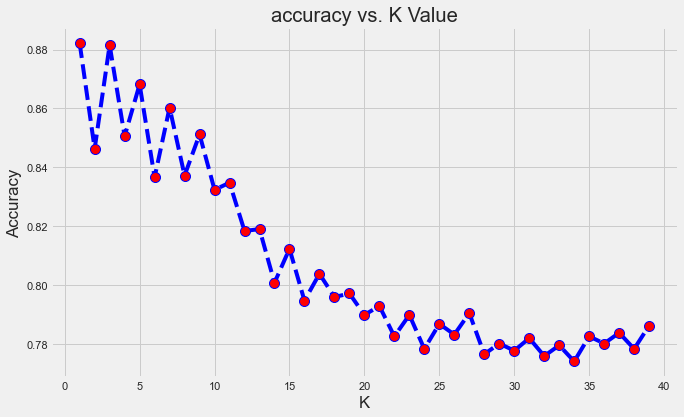

In [19]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    yhat = knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [20]:
# Training using only standardized features on a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
print(cross_val_score(knn, x_train, y_train, cv=cv))
print(cross_val_score(knn, x_train, y_train, cv=cv).mean())

[0.85416667 0.88802083 0.859375   0.87239583 0.84114583 0.87760417
 0.86979167 0.88020833 0.83333333 0.86458333]
0.8640625


In [143]:
sgd_cls_params = {
    'loss':['log_loss'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5,2,50)
}

sgd_cls = SGDClassifier()
sgd_cls_gs = GridSearchCV(sgd_cls, sgd_cls_params, cv=cv, verbose=1)

In [144]:
sgd_cls_gs.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=20, shuffle=True),
             estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.389495...
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02]),
                         'loss': ['log_loss'], 'penalty': ['l1', 'l2']},
             verbose=1)

In [145]:
print(sgd_cls_gs.best_params_)
print(sgd_cls_gs.best_score_)

{'alpha': 0.01, 'loss': 'log_loss', 'penalty': 'l2'}
0.5835937500000001


In [146]:
clf = DecisionTreeClassifier(max_depth =None)
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [147]:
print(cross_val_score(clf, x_train, y_train, cv=cv))
print(cross_val_score(clf, x_train, y_train, cv=cv).mean())

[0.8359375  0.77864583 0.70052083 0.84114583 0.83072917 0.7578125
 0.88020833 0.79427083 0.78385417 0.79166667]
0.7966145833333332


In [148]:
bdt = BaggingClassifier(DecisionTreeClassifier())
bdt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [149]:
print(cross_val_score(bdt, x_train, y_train, cv=cv))
print(cross_val_score(bdt, x_train, y_train, cv=cv).mean())

[0.90104167 0.96875    0.94270833 0.9140625  0.875      0.91927083
 0.9296875  0.95052083 0.921875   0.95572917]
0.9268229166666668


In [150]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [151]:
print(cross_val_score(rf, x_train, y_train, cv=cv))
print(cross_val_score(rf, x_train, y_train, cv=cv).mean())

[0.91666667 0.90364583 0.94010417 0.88541667 0.828125   0.89322917
 0.84635417 0.796875   0.90885417 0.90885417]
0.8856770833333332


In [152]:
etc = ExtraTreesClassifier(n_jobs=-1)
etc.fit(x_train, y_train)

ExtraTreesClassifier(n_jobs=-1)

In [153]:
print(cross_val_score(etc, x_train, y_train, cv=cv))
print(cross_val_score(etc, x_train, y_train, cv=cv).mean())

[0.98958333 0.99479167 0.98958333 0.984375   0.98697917 0.97916667
 0.98177083 0.98177083 0.9921875  0.98958333]
0.9877604166666668


In [154]:
cross_val_score(knn, x_test, y_test, cv=cv).mean()

0.7357243163340723

In [155]:
cross_val_score(sgd_cls_gs, x_test, y_test, cv=cv).mean()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.5492054693274205

In [156]:
cross_val_score(clf, x_test, y_test, cv=cv).mean()

0.7387730968218772

In [157]:
cross_val_score(bdt, x_test, y_test, cv=cv).mean()

0.8687472283813747

In [158]:
cross_val_score(rf, x_test, y_test, cv=cv).mean()

0.861548410938655

In [159]:
cross_val_score(etc, x_test, y_test, cv=cv).mean()

0.9817738359201773

In [160]:
predictC = knn.predict(x_test)
probaC = knn.predict_proba(x_test)

In [161]:
predicte = etc.predict(x_test)
probae = etc.predict_proba(x_test)

In [162]:
# TP FN
# FP TN
confusion_matrix(y_test, predictC)

array([[734,  77],
       [199, 636]])

In [163]:
# TP FN
# FP TN
confusion_matrix(y_test, predicte)

array([[802,   9],
       [ 15, 820]])

In [164]:
print(accuracy_score(y_test, predictC))

0.8323207776427703


In [165]:
print(recall_score(y_test, predictC))

0.7616766467065869


In [166]:
print(classification_report(y_test, predictC))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       811
           1       0.89      0.76      0.82       835

    accuracy                           0.83      1646
   macro avg       0.84      0.83      0.83      1646
weighted avg       0.84      0.83      0.83      1646



In [167]:
print(classification_report(y_test, predicte))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       811
           1       0.99      0.98      0.99       835

    accuracy                           0.99      1646
   macro avg       0.99      0.99      0.99      1646
weighted avg       0.99      0.99      0.99      1646



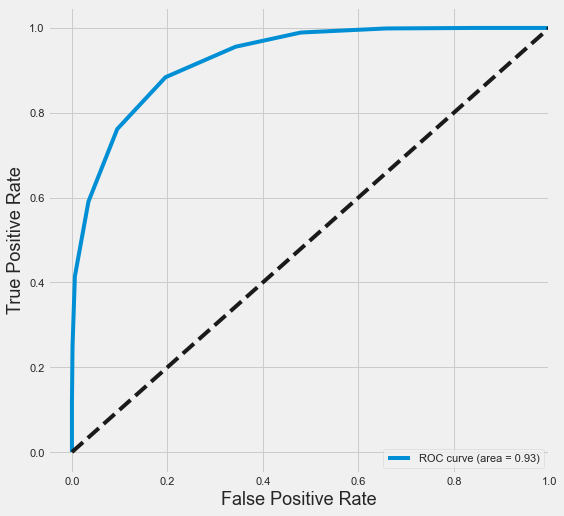

In [168]:
fpr, tpr, _ = roc_curve(y_test, probaC[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

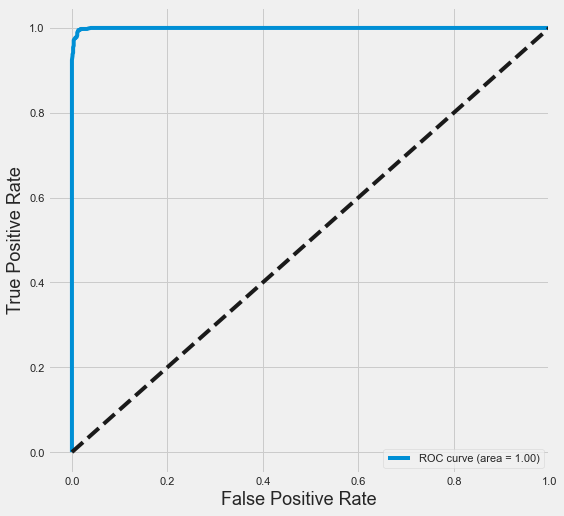

In [169]:
# Data leakage much 

fpr, tpr, _ = roc_curve(y_test, probae[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [170]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [171]:
optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(x_train, y_train,)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................./Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3477123072034374, tolerance: 0.08635821759259278
  model = cd_fast.enet_coordinate_descent_gram(
./Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.991983704698555, tolerance: 0.08635821759259278
  model = cd_fast.enet_coordinate_descent_gram(
./Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to 

0.0023859533822345406


........................../Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3144658240321405, tolerance: 0.08632766203703686
  model = cd_fast.enet_coordinate_descent_gram(
..................................................................................................../Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5304646134395625, tolerance: 0.0863819155092587
  model = cd_fast.enet_coordinate_descent_gram(
.....................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [172]:
lasso = LassoCV(n_alphas=1, cv=10)
lasso.fit(x_train, y_train)
lasso_scores = cross_val_score(lasso, x_train, y_train, cv=10)
print(lasso_scores)
print(np.mean(lasso_scores))

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.85036080586741, tolerance: 0.08635821759259278
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9885767908280059, tolerance: 0.08635135995370341
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.60202752284249, tolerance: 0.08634398148148219
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anacon

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.32273649811515, tolerance: 0.07764553054662411
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.88247802947893, tolerance: 0.07770598070739565
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.367576605511431, tolerance: 0.07772479099678464
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anacond

[ 0.01975351  0.02284323  0.01436898 -0.00179132  0.01576259  0.02712448
 -0.00530291  0.05138587  0.04753672  0.03234973]
0.02240308755952659


In [173]:
lasso.fit(x_train, y_train)
lasso_coefs = pd.DataFrame({'variable': x.columns, 'coef': lasso.coef_, \
                           'abs_coef': np.abs(lasso.coef_)})
lasso_coefs.head()
lasso_coefs.sort_values('abs_coef', ascending=False).head(10)

/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.85036080586741, tolerance: 0.08635821759259278
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9885767908280059, tolerance: 0.08635135995370341
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.60202752284249, tolerance: 0.08634398148148219
  model = cd_fast.enet_coordinate_descent_gram(
/Users/akinakinlabi/opt/anacon

,variable,coef,abs_coef
56,net_worth,0.15,0.15
67,total_xp,-0.13,0.13
71,xp_per_min,0.10,0.10
50,last_hits,-0.06,0.06
33,dire_score,-0.05,0.05
12,attack_range,0.04,0.04
69,tower_status_radiant,-0.04,0.04
10,assists,0.04,0.04
13,attack_rate,-0.04,0.04
0,Carry,-0.04,0.04


In [174]:
lasso_coefs.sort_values('abs_coef', ascending=False)

,variable,coef,abs_coef
56,net_worth,0.15,0.15
67,total_xp,-0.13,0.13
71,xp_per_min,0.10,0.10
50,last_hits,-0.06,0.06
33,dire_score,-0.05,0.05
12,attack_range,0.04,0.04
69,tower_status_radiant,-0.04,0.04
10,assists,0.04,0.04
13,attack_rate,-0.04,0.04
0,Carry,-0.04,0.04


In [175]:
# I think data is overfitting. We have too many features and potential data leakage. We need to reduce # of features.
# We can start with using Lasso to remove our bottom coefficients

In [176]:
lasso_coefs[lasso_coefs.abs_coef < 0.005]

,variable,coef,abs_coef
4,Initiator,0.00,0.00
6,Pusher,0.00,0.00
7,Support,-0.00,0.00
8,abandons,0.00,0.00
17,backpack_2,-0.00,0.00
26,base_int,-0.00,0.00
27,base_mana,0.00,0.00
28,base_mana_regen,-0.00,0.00
30,day_vision,0.00,0.00
38,hero_id,-0.00,0.00


In [177]:
lasso_coefs[lasso_coefs.abs_coef == 0.00]

,variable,coef,abs_coef
30,day_vision,0.00,0.00
59,player_slot,0.00,0.00


In [178]:
x.to_pickle('train.pkl')

In [179]:
y.to_pickle('target.pkl')